In [66]:
import os

os.listdir("/kaggle/input")


['datasets']

In [67]:
os.listdir("/kaggle/input/datasets/emmarex/plantdisease/PlantVillage")

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [68]:
import os
import pandas as pd

base_path = "/kaggle/input/datasets/emmarex/plantdisease/PlantVillage"

# taking tomato classes
tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

data = []
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    data.append([cls, len(os.listdir(cls_path))])

df = pd.DataFrame(data, columns=["Class", "Number of Images"])
df

,Class,Number of Images
0,Tomato_Leaf_Mold,952
1,Tomato__Tomato_YellowLeaf__Curl_Virus,3209
2,Tomato_Bacterial_spot,2127
3,Tomato_Septoria_leaf_spot,1771
4,Tomato_healthy,1591
5,Tomato_Spider_mites_Two_spotted_spider_mite,1676
6,Tomato_Early_blight,1000
7,Tomato__Target_Spot,1404
8,Tomato_Late_blight,1909
9,Tomato__Tomato_mosaic_virus,373


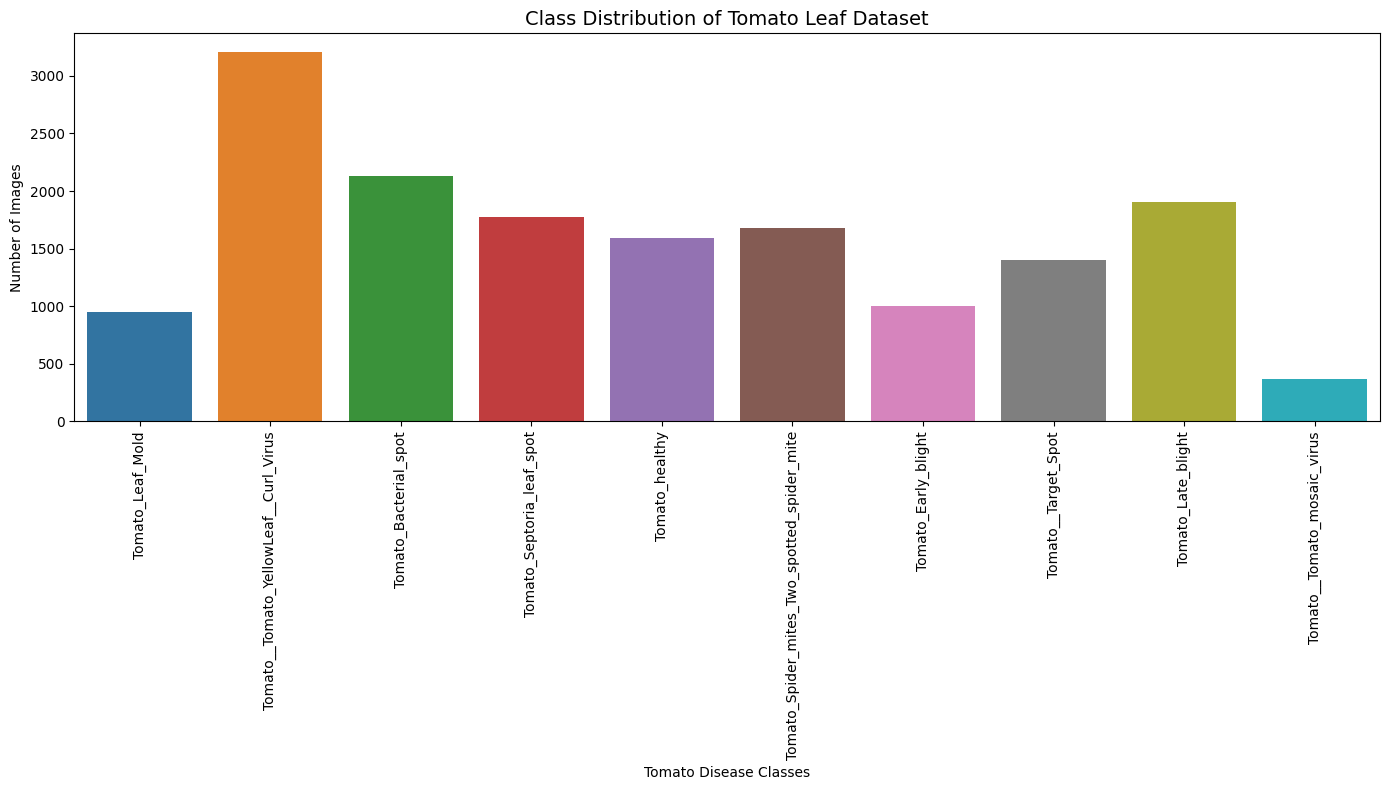

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))

sns.barplot(
    data=df,
    x="Class",
    y="Number of Images",
    hue="Class",                 
    palette="tab10",
    legend=False                 
)

plt.xticks(rotation=90)
plt.title("Class Distribution of Tomato Leaf Dataset", fontsize=14)
plt.xlabel("Tomato Disease Classes")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


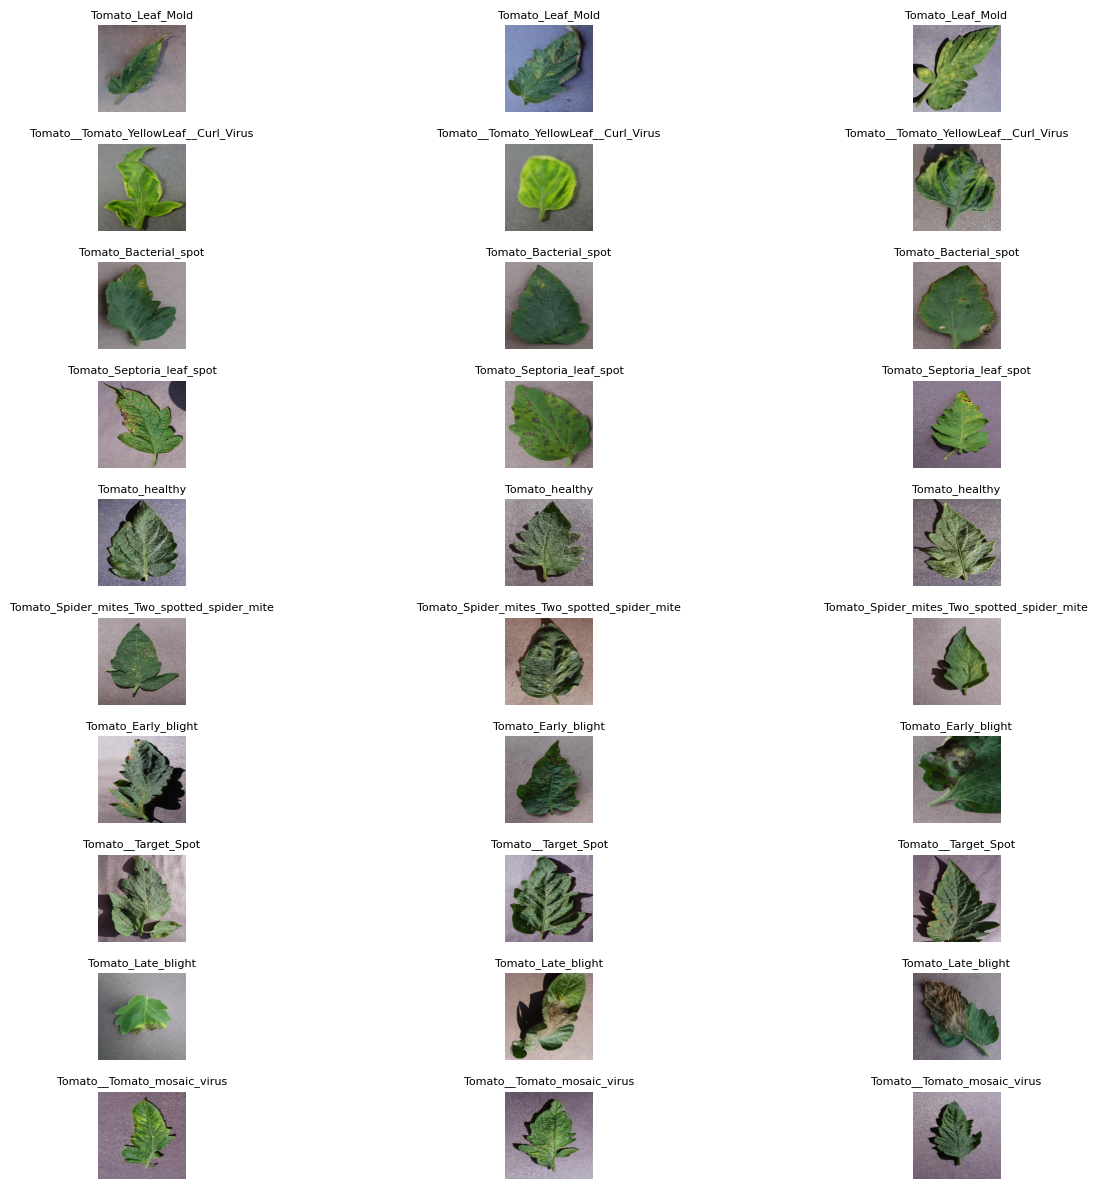

In [70]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

base_path = "/kaggle/input/datasets/emmarex/plantdisease/PlantVillage"

tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

plt.figure(figsize=(15,12))

img_index = 1
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    images = os.listdir(cls_path)
    
    # we randomly select 3 images per class
    sample_images = random.sample(images, 3)
    
    for img_name in sample_images:
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        
        plt.subplot(len(tomato_classes), 3, img_index)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls, fontsize=8)
        img_index += 1

plt.tight_layout()
plt.show()

In [71]:
import os
from PIL import Image
import pandas as pd
import random

base_path = "/kaggle/input/datasets/emmarex/plantdisease/PlantVillage"
tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

sizes = []

# some sample images 
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    images = random.sample(os.listdir(cls_path), 50)
    
    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        sizes.append(img.size)  # (width, height)

df_sizes = pd.DataFrame(sizes, columns=["Width", "Height"])
df_sizes.head()


,Width,Height
0,256,256
1,256,256
2,256,256
3,256,256
4,256,256


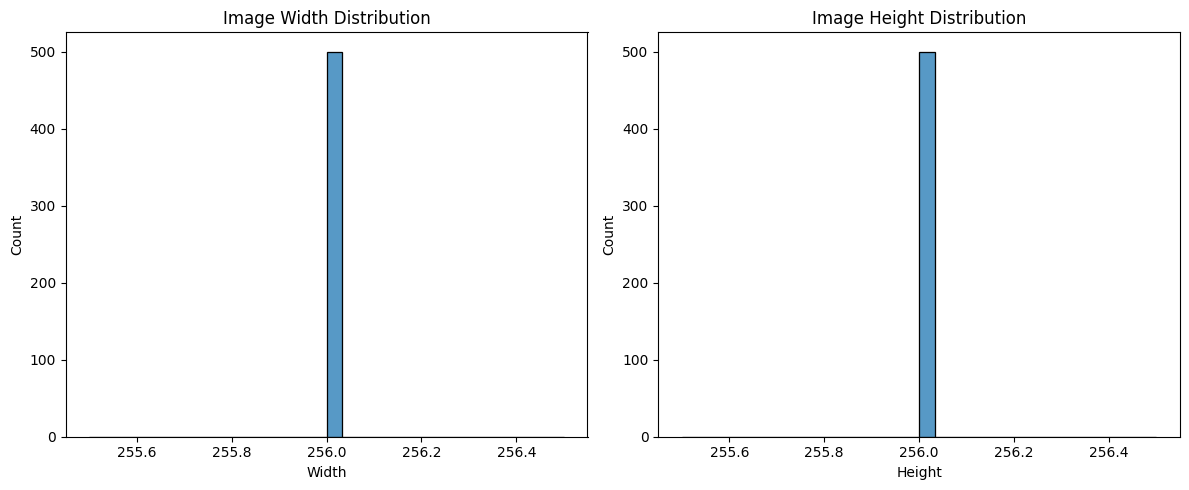

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_sizes["Width"], bins=30)
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
sns.histplot(df_sizes["Height"], bins=30)
plt.title("Image Height Distribution")

plt.tight_layout()
plt.show()

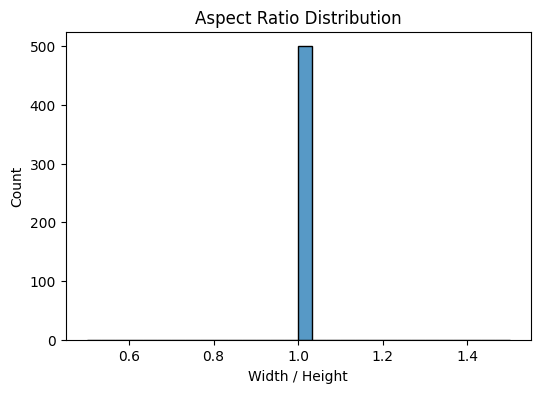

In [73]:
df_sizes["Aspect_Ratio"] = df_sizes["Width"] / df_sizes["Height"]

plt.figure(figsize=(6,4))
sns.histplot(df_sizes["Aspect_Ratio"], bins=30)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.show()

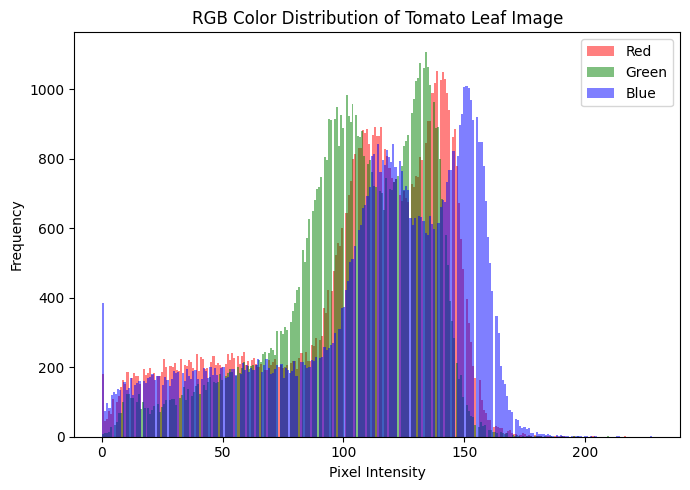

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(img_path).convert("RGB")
img_np = np.array(img)

plt.figure(figsize=(7,5))
plt.hist(img_np[:,:,0].ravel(), bins=256, alpha=0.5, label="Red", color="red")
plt.hist(img_np[:,:,1].ravel(), bins=256, alpha=0.5, label="Green", color="green")
plt.hist(img_np[:,:,2].ravel(), bins=256, alpha=0.5, label="Blue", color="blue")

plt.legend()
plt.title("RGB Color Distribution of Tomato Leaf Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


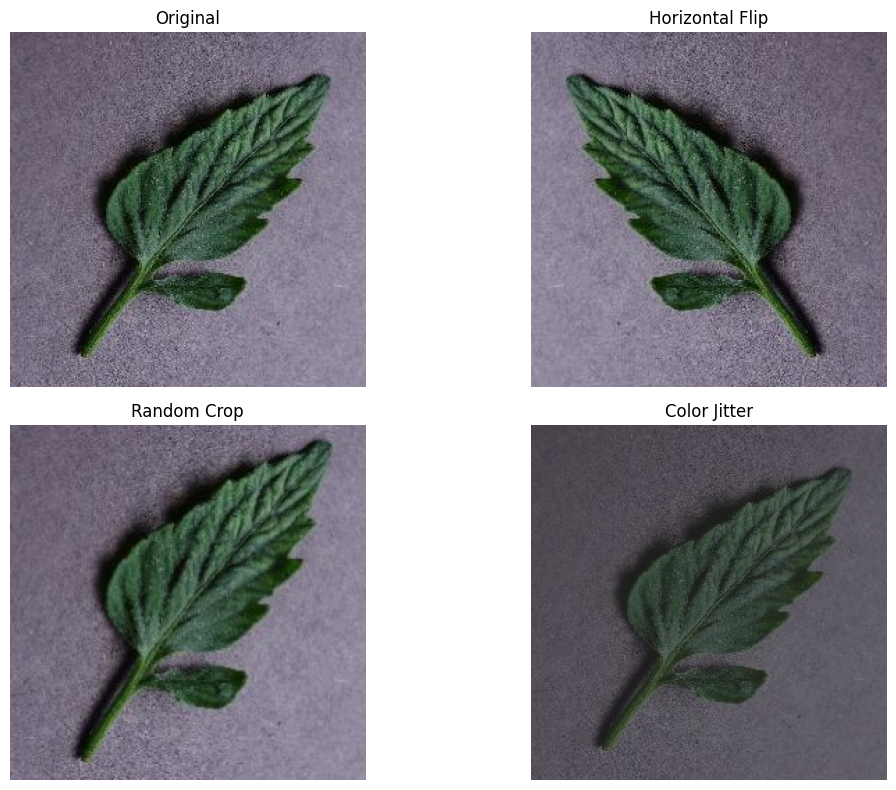

In [75]:
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Load one sample image
img = Image.open(img_path).convert("RGB")

# Define augmentations
augmentations = {
    "Original": transforms.ToTensor(),
    "Horizontal Flip": transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor()
    ]),
    "Random Crop": transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ToTensor()
    ]),
    "Color Jitter": transforms.Compose([
        transforms.ColorJitter(brightness=0.4, contrast=0.4),
        transforms.ToTensor()
    ])
}

# Plot results
plt.figure(figsize=(12,8))
for i, (title, aug) in enumerate(augmentations.items()):
    augmented_img = aug(img).permute(1,2,0)
    plt.subplot(2,2,i+1)
    plt.imshow(augmented_img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [78]:
import os
import shutil

source_path = "/kaggle/input/datasets/emmarex/plantdisease/PlantVillage"
target_path = "/kaggle/working/TomatoSplit"  # ✅ fixed spelling

os.makedirs(target_path, exist_ok=True)

for folder in os.listdir(source_path):
    if folder.startswith("Tomato"):
        shutil.copytree(
            os.path.join(source_path, folder),
            os.path.join(target_path, folder),
            dirs_exist_ok=True   # ✅ THIS FIXES THE ERROR
        )

print("✅ Tomato folders copied successfully!")


✅ Tomato folders copied successfully!


In [79]:
import os
import shutil
import random

# ---------------- CONFIG ----------------
SOURCE_DIR = "/kaggle/working/TomatoOnly"
DEST_DIR   = "/kaggle/working/TomatoSplit"
TRAIN_RATIO = 0.7
SEED = 42

random.seed(SEED)

# ---------------- CREATE FOLDERS ----------------
train_dir = os.path.join(DEST_DIR, "train")
test_dir  = os.path.join(DEST_DIR, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# ---------------- SPLIT DATA ----------------
classes = os.listdir(SOURCE_DIR)

for cls in classes:
    cls_path = os.path.join(SOURCE_DIR, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)

    split_idx = int(len(images) * TRAIN_RATIO)
    train_images = images[:split_idx]
    test_images  = images[split_idx:]

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    for img in train_images:
        src = os.path.join(cls_path, img)
        dst = os.path.join(train_dir, cls, img)
        shutil.copy2(src, dst)

    for img in test_images:
        src = os.path.join(cls_path, img)
        dst = os.path.join(test_dir, cls, img)
        shutil.copy2(src, dst)

    print(f"{cls}: Train={len(train_images)} | Test={len(test_images)}")

print("✅ Dataset split completed successfully")


Tomato_Leaf_Mold: Train=666 | Test=286
Tomato_healthy: Train=1113 | Test=478
Tomato_Spider_mites_Two_spotted_spider_mite: Train=1173 | Test=503
Tomato__Target_Spot: Train=982 | Test=422
Tomato__Tomato_YellowLeaf__Curl_Virus: Train=2246 | Test=963
Tomato_Septoria_leaf_spot: Train=1239 | Test=532
Tomato_Late_blight: Train=1336 | Test=573
Tomato_Bacterial_spot: Train=1488 | Test=639
Tomato__Tomato_mosaic_virus: Train=261 | Test=112
Tomato_Early_blight: Train=700 | Test=300
✅ Dataset split completed successfully


In [80]:
from torchvision.datasets import ImageFolder

train_ds = ImageFolder("/kaggle/working/TomatoSplit/train")
test_ds  = ImageFolder("/kaggle/working/TomatoSplit/test")

print("Train images:", len(train_ds))
print("Test images:", len(test_ds))
print("Classes:", train_ds.classes)


Train images: 11203
Test images: 4808
Classes: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


Using device: cuda
Classes: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

Epoch 1/50: 100%|██████████| 351/351 [01:50<00:00,  3.17it/s, loss=1.18] 


Epoch 1/50 | Train Loss: 1.8170 | Val Loss: 1.1618 | Val Acc: 0.5763
✅ Best model saved!


Epoch 2/50: 100%|██████████| 351/351 [01:49<00:00,  3.21it/s, loss=1.79] 


Epoch 2/50 | Train Loss: 1.0705 | Val Loss: 1.3656 | Val Acc: 0.5474
Early stopping counter: 1/7


Epoch 3/50: 100%|██████████| 351/351 [01:49<00:00,  3.21it/s, loss=0.0389]


Epoch 3/50 | Train Loss: 0.8093 | Val Loss: 0.6406 | Val Acc: 0.7781
✅ Best model saved!


Epoch 4/50: 100%|██████████| 351/351 [01:49<00:00,  3.22it/s, loss=0.0328]


Epoch 4/50 | Train Loss: 0.6112 | Val Loss: 0.4678 | Val Acc: 0.8532
✅ Best model saved!


Epoch 5/50: 100%|██████████| 351/351 [01:48<00:00,  3.22it/s, loss=0.25] 


Epoch 5/50 | Train Loss: 0.4959 | Val Loss: 0.2595 | Val Acc: 0.9174
✅ Best model saved!


Epoch 6/50: 100%|██████████| 351/351 [01:48<00:00,  3.23it/s, loss=0.058] 


Epoch 6/50 | Train Loss: 0.4041 | Val Loss: 0.2449 | Val Acc: 0.9081
✅ Best model saved!


Epoch 7/50: 100%|██████████| 351/351 [01:48<00:00,  3.23it/s, loss=0.914] 


Epoch 7/50 | Train Loss: 0.3799 | Val Loss: 0.3423 | Val Acc: 0.8958
Early stopping counter: 1/7


Epoch 8/50: 100%|██████████| 351/351 [01:48<00:00,  3.23it/s, loss=0.447] 


Epoch 8/50 | Train Loss: 0.3396 | Val Loss: 0.2269 | Val Acc: 0.9189
✅ Best model saved!


Epoch 9/50: 100%|██████████| 351/351 [01:48<00:00,  3.23it/s, loss=0.0314]


Epoch 9/50 | Train Loss: 0.3147 | Val Loss: 0.1845 | Val Acc: 0.9418
✅ Best model saved!


Epoch 10/50: 100%|██████████| 351/351 [01:48<00:00,  3.23it/s, loss=0.00632]


Epoch 10/50 | Train Loss: 0.2852 | Val Loss: 0.1276 | Val Acc: 0.9605
✅ Best model saved!


Epoch 11/50: 100%|██████████| 351/351 [01:48<00:00,  3.24it/s, loss=0.0355]


Epoch 11/50 | Train Loss: 0.2559 | Val Loss: 0.1945 | Val Acc: 0.9416
Early stopping counter: 1/7


Epoch 12/50: 100%|██████████| 351/351 [01:48<00:00,  3.25it/s, loss=0.00487]


Epoch 12/50 | Train Loss: 0.2702 | Val Loss: 0.3903 | Val Acc: 0.8777
Early stopping counter: 2/7


Epoch 13/50: 100%|██████████| 351/351 [01:48<00:00,  3.24it/s, loss=0.00823]


Epoch 13/50 | Train Loss: 0.2571 | Val Loss: 0.1326 | Val Acc: 0.9561
Early stopping counter: 3/7


Epoch 14/50: 100%|██████████| 351/351 [01:47<00:00,  3.25it/s, loss=0.0302]


Epoch 14/50 | Train Loss: 0.2277 | Val Loss: 0.1730 | Val Acc: 0.9413
Early stopping counter: 4/7


Epoch 15/50: 100%|██████████| 351/351 [01:47<00:00,  3.25it/s, loss=0.281] 


Epoch 15/50 | Train Loss: 0.2222 | Val Loss: 0.1150 | Val Acc: 0.9657
✅ Best model saved!


Epoch 16/50: 100%|██████████| 351/351 [01:48<00:00,  3.24it/s, loss=0.000186]


Epoch 16/50 | Train Loss: 0.2143 | Val Loss: 0.1913 | Val Acc: 0.9403
Early stopping counter: 1/7


Epoch 17/50: 100%|██████████| 351/351 [01:47<00:00,  3.26it/s, loss=0.0697]


Epoch 17/50 | Train Loss: 0.2300 | Val Loss: 0.1436 | Val Acc: 0.9515
Early stopping counter: 2/7


Epoch 18/50: 100%|██████████| 351/351 [01:48<00:00,  3.25it/s, loss=0.0846] 


Epoch 18/50 | Train Loss: 0.2079 | Val Loss: 0.0893 | Val Acc: 0.9700
✅ Best model saved!


Epoch 19/50: 100%|██████████| 351/351 [01:47<00:00,  3.25it/s, loss=0.0321] 


Epoch 19/50 | Train Loss: 0.1953 | Val Loss: 0.1132 | Val Acc: 0.9634
Early stopping counter: 1/7


Epoch 20/50: 100%|██████████| 351/351 [01:47<00:00,  3.25it/s, loss=0.00295]


Epoch 20/50 | Train Loss: 0.1880 | Val Loss: 0.0993 | Val Acc: 0.9680
Early stopping counter: 2/7


Epoch 21/50: 100%|██████████| 351/351 [01:48<00:00,  3.25it/s, loss=0.00787]


Epoch 21/50 | Train Loss: 0.1925 | Val Loss: 0.1347 | Val Acc: 0.9532
Early stopping counter: 3/7


Epoch 22/50: 100%|██████████| 351/351 [01:47<00:00,  3.25it/s, loss=0.484]  


Epoch 22/50 | Train Loss: 0.2032 | Val Loss: 0.0924 | Val Acc: 0.9705
Early stopping counter: 4/7


Epoch 23/50: 100%|██████████| 351/351 [01:47<00:00,  3.25it/s, loss=1.66]  


Epoch 23/50 | Train Loss: 0.1881 | Val Loss: 0.1113 | Val Acc: 0.9698
Early stopping counter: 5/7


Epoch 24/50: 100%|██████████| 351/351 [01:47<00:00,  3.26it/s, loss=0.00845]


Epoch 24/50 | Train Loss: 0.1801 | Val Loss: 0.1085 | Val Acc: 0.9619
Early stopping counter: 6/7


Epoch 25/50: 100%|██████████| 351/351 [01:47<00:00,  3.26it/s, loss=0.00202]


Epoch 25/50 | Train Loss: 0.1652 | Val Loss: 0.1449 | Val Acc: 0.9547
Early stopping counter: 7/7
⛔ Early stopping triggered!


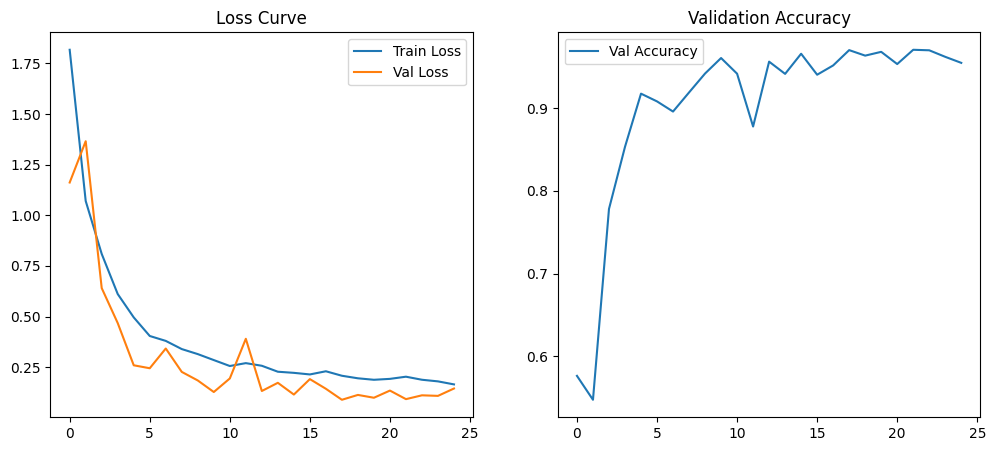

In [91]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# ---------------- CONFIG ----------------
DATA_DIR = "/kaggle/working/TomatoSplit"
BATCH_SIZE = 32
EPOCHS = 50
LR = 3e-4
IMG_SIZE = 224
PATIENCE = 7   # Early stopping patience
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print("Using device:", DEVICE)

# ---------------- TRANSFORMS ----------------
train_tfms = v2.Compose([
    v2.RandomResizedCrop(IMG_SIZE),
    v2.RandomHorizontalFlip(),
    v2.RandomRotation(20),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
])

val_tfms = v2.Compose([
    v2.Resize((IMG_SIZE, IMG_SIZE)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
])

# ---------------- DATA ----------------
train_ds = ImageFolder(f"{DATA_DIR}/train", transform=train_tfms)
val_ds   = ImageFolder(f"{DATA_DIR}/test", transform=val_tfms)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

NUM_CLASSES = len(train_ds.classes)
print("Classes:", train_ds.classes)

# ---------------- MODEL (VGG16) ----------------
model = timm.create_model(
    "vgg16",
    pretrained=True,
    num_classes=NUM_CLASSES
).to(DEVICE)

# ---------------- TRAIN SETUP ----------------
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

use_amp = DEVICE == "cuda"
scaler = torch.amp.GradScaler("cuda") if use_amp else None

train_losses = []
val_losses = []
val_accs = []

best_val_loss = float("inf")
patience_counter = 0

# ---------------- TRAIN LOOP ----------------
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

    for imgs, labels in loop:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad(set_to_none=True)

        if use_amp:
            with torch.autocast(device_type="cuda", dtype=torch.float16):
                outputs = model(imgs)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        train_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # ---------- VALIDATION ----------
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)

            if use_amp:
                with torch.autocast(device_type="cuda", dtype=torch.float16):
                    outputs = model(imgs)
                    loss = criterion(outputs, labels)
            else:
                outputs = model(imgs)
                loss = criterion(outputs, labels)

            val_loss += loss.item()
            preds = outputs.argmax(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(val_loader)
    acc = correct / total

    val_losses.append(val_loss)
    val_accs.append(acc)

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Train Loss: {train_loss:.4f} | "
        f"Val Loss: {val_loss:.4f} | "
        f"Val Acc: {acc:.4f}"
    )

    # ---------- EARLY STOPPING ----------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_vgg16_model.pth")
        print("✅ Best model saved!")
    else:
        patience_counter += 1
        print(f"Early stopping counter: {patience_counter}/{PATIENCE}")

        if patience_counter >= PATIENCE:
            print("⛔ Early stopping triggered!")
            break

# ---------------- SAVE FINAL MODEL ----------------
torch.save(model.state_dict(), "vgg16_final_model.pth")

# ---------------- PLOTS ----------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(val_accs, label="Val Accuracy")
plt.legend()
plt.title("Validation Accuracy")

plt.show()


In [94]:
!pip install grad-cam




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44285 sha256=99af0013099f859841c416dceb9fcfaae10d71df053bd94c739c86db87759af4
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


========== MODEL EVALUATION ==========
Accuracy: 0.9547
Precision (macro): 0.9501
Recall (macro): 0.9516
F1-score (macro): 0.9485
AUC (macro): 0.9992
Testing Time: 28.70 sec


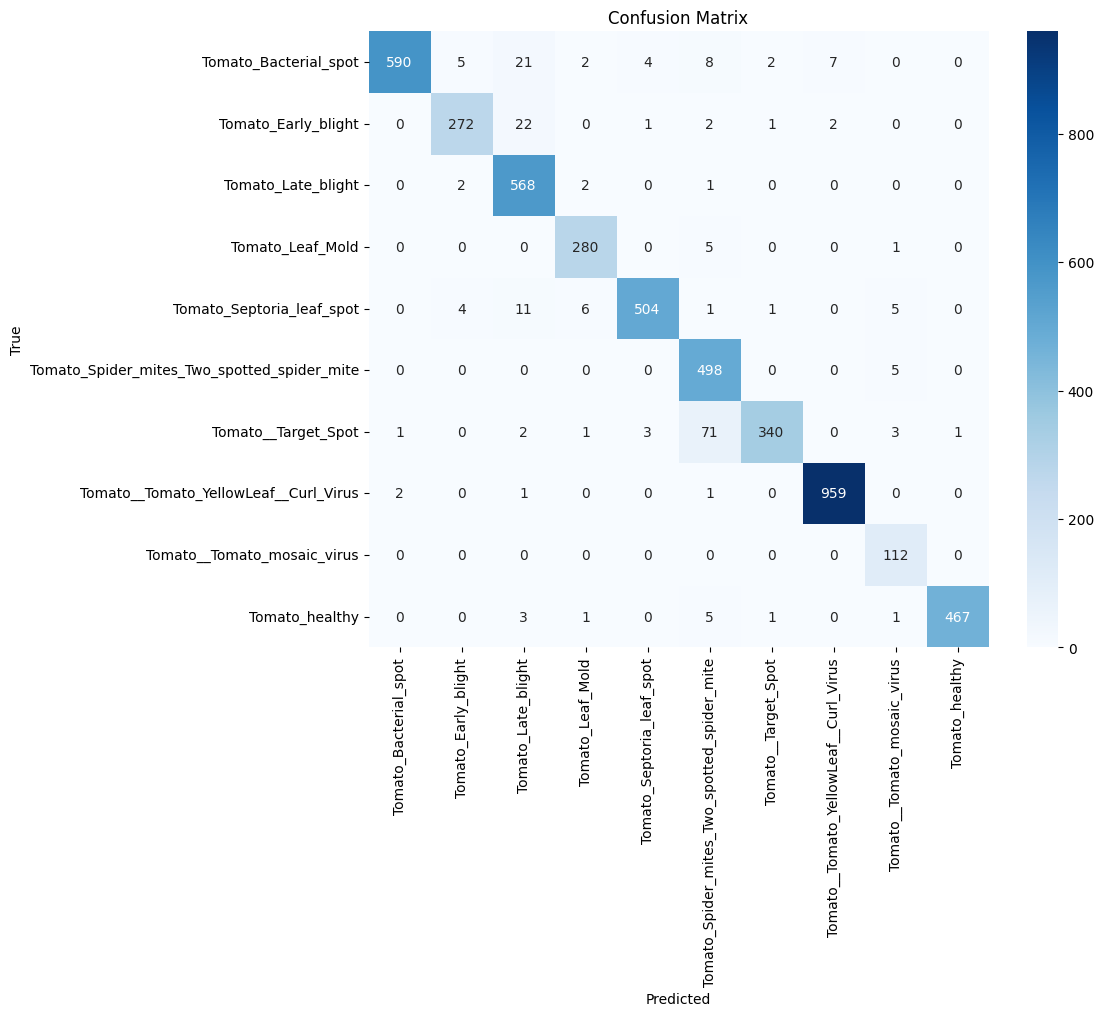

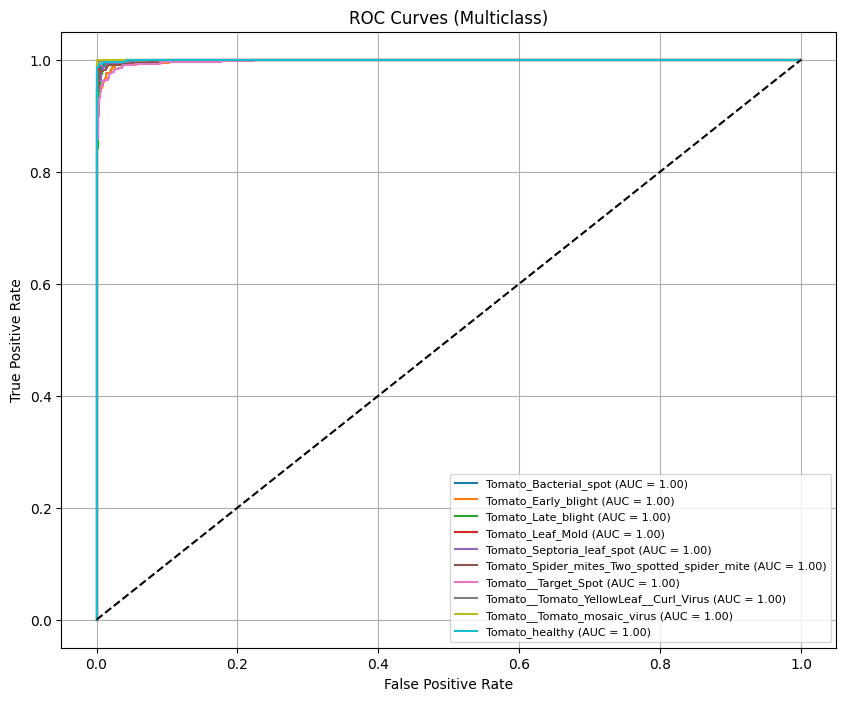

In [92]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import seaborn as sns

# ---------------- EVAL MODE ----------------
model.eval()

y_true = []
y_pred = []
y_prob = []

start_test = time.time()

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(DEVICE)
        labels = labels.to(DEVICE)

        outputs = model(imgs)
        probs = torch.softmax(outputs, dim=1)

        preds = torch.argmax(probs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_prob.extend(probs.cpu().numpy())

end_test = time.time()

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# ---------------- METRICS ----------------
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

# ---------------- AUC (MULTICLASS) ----------------
y_true_bin = label_binarize(y_true, classes=np.arange(NUM_CLASSES))

auc_scores = []
fpr = {}
tpr = {}

for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    auc_scores.append(auc(fpr[i], tpr[i]))

macro_auc = np.mean(auc_scores)

# ---------------- PRINT RESULTS ----------------
print("=" * 10, "MODEL EVALUATION", "=" * 10)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")
print(f"AUC (macro): {macro_auc:.4f}")
print(f"Testing Time: {end_test - start_test:.2f} sec")

# ---------------- CONFUSION MATRIX ----------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=train_ds.classes,
    yticklabels=train_ds.classes
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ---------------- ROC CURVES ----------------
plt.figure(figsize=(10,8))

for i, class_name in enumerate(train_ds.classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"{class_name} (AUC = {auc_scores[i]:.2f})"
    )

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Multiclass)")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()


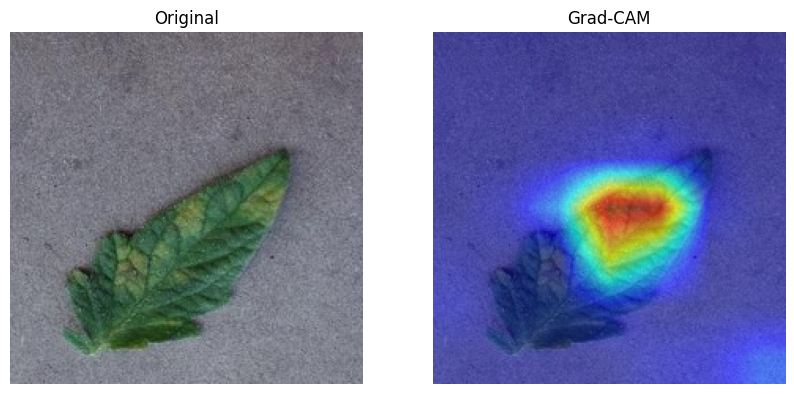

In [96]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import v2
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import timm

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMG_SIZE = 224

# ---------- Load Model ----------
model = timm.create_model("vgg16", pretrained=False, num_classes=NUM_CLASSES)
model.load_state_dict(torch.load("best_vgg16_model.pth", map_location=DEVICE))
model.to(DEVICE)
model.eval()

# ---------- Target Layer ----------
target_layers = [model.features[-1]]  # Last conv layer

# ---------- Transform ----------
transform = v2.Compose([
    v2.Resize((IMG_SIZE, IMG_SIZE)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
])

# ---------- Load Image ----------
img_path = "/kaggle/working/TomatoSpilt/Tomato_Leaf_Mold/00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG"
img = Image.open(img_path).convert("RGB")

input_tensor = transform(img).unsqueeze(0).to(DEVICE)

# ---------- GradCAM ----------
cam = GradCAM(model=model, target_layers=target_layers)

targets = None  # Automatically uses predicted class

grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
grayscale_cam = grayscale_cam[0]

# ---------- Convert Image ----------
rgb_img = np.array(img.resize((IMG_SIZE, IMG_SIZE))) / 255.0
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# ---------- Plot ----------
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(visualization)
plt.title("Grad-CAM")
plt.axis("off")

plt.show()
